In [53]:
import cv2
import tifffile as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import os
from tqdm import tqdm

# Load TIFF file using tifffile
working_dir=current_working_dir = Path(os.getcwd())
txt_path = os.path.join(current_working_dir, 'segmentation_outputs_1', 'CellA_ShME480', 'txt_outlines')
csv_path= os.path.join(current_working_dir, "record.csv")

def get_contour_from_txt(txt_path):
    contours = []

    for file in os.listdir(txt_path):
        file_path = os.path.join(txt_path, file)

        #Read the contents of the txt file line by line
        with open(file_path, 'r') as f:
            content = f.read()
            #create strings when whitespace is detected
            strings = content.split()

        for s in strings:
            #Separate by commas
            points = [int(x) for x in s.split(',')]

            #Pair the points (x, y)
            contour = np.array([(points[i], points[i + 1]) for i in range(0, len(points), 2)], dtype=np.int32)

            #Reshape into OpenCV contour format
            contour = contour.reshape((-1, 1, 2))

            contours.append(contour)

    return contours
    

# Function to calculate area and perimeter
def calculate_area_and_perimeter(contour):
    
    # Check if contours are found
    if len(contour)>0 and len(contour[0])>0:
        # Calculate area and perimeter
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        return area, perimeter
    else:
        return 0, 0  # Return zero area and perimeter if no contours are found


Data has been saved to c:\Users\mriza\Desktop\deformation_cytometry\record.csv


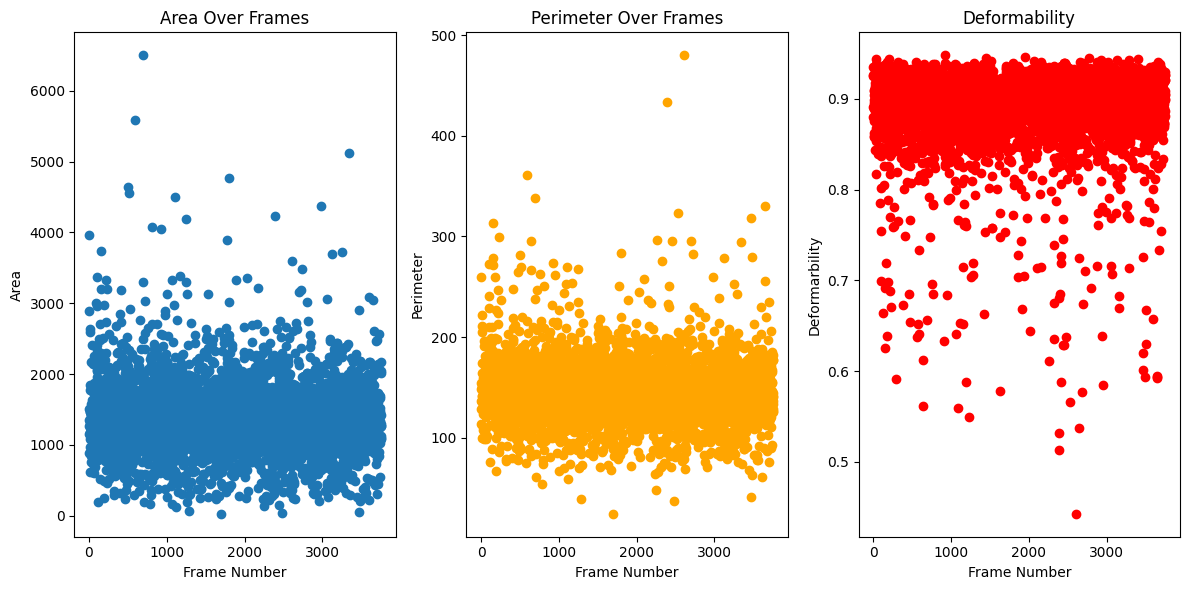

In [54]:

# List to store data for each frame
data_list = []

# Lists to store perimeters and areas
perimeters = []
areas = []
deformabilities = []

txt_stack=get_contour_from_txt(txt_path)

# Iterate through all frames """
for frame_count, frame in enumerate(txt_stack, start=1):
    # Calculate area and perimeter for the current frame
    area, perimeter = calculate_area_and_perimeter(frame)
    deformability = (2*np.sqrt(np.pi*area))/(perimeter)

    # Append data to the list
    data_list.append({'Frame': frame_count, 'Area': area, 'Perimeter': perimeter, 'Deformability': deformability})
    # Append the values to the lists
    areas.append(area)
    perimeters.append(perimeter)
    deformabilities.append(deformability)

# Specify the CSV file path
csv_file_path = csv_path

# Write data to a CSV file
with open(csv_file_path, 'w', newline='') as csv_file:
    fieldnames = ['Frame', 'Area', 'Perimeter','Deformability']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    # Write header
    writer.writeheader()
 # Write data for each frame
    writer.writerows(data_list)

print(f'Data has been saved to {csv_file_path}')

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(range(1, len(areas) + 1), areas, marker='o')
plt.title('Area Over Frames')
plt.xlabel('Frame Number')
plt.ylabel('Area')

plt.subplot(1, 3, 2)
plt.scatter(range(1, len(perimeters) + 1), perimeters, marker='o', color='orange')
plt.title('Perimeter Over Frames')
plt.xlabel('Frame Number')
plt.ylabel('Perimeter')

plt.subplot(1, 3, 3)
plt.scatter(range(1, len(deformabilities) + 1), deformabilities, marker='o', color='red')
plt.title('Deformability')
plt.xlabel('Frame Number')
plt.ylabel('Deformarbility')

plt.tight_layout()
plt.show()